# Script for the descriptive statistics of the dataset

In [11]:
import pandas as pd

#Reading the Corpus
article=pd.read_csv('../data/d_df.tsv', sep="\t")


In [28]:
# give all column names from the corpus
article.tail()

,Unnamed: 0,body,body_text,wordcount,section_name,web_publication_date,headline,web_title,production_office,publication
6808,6809,<p>Science fiction is the Cinderella of the li...,Science fiction is the Cinderella of the liter...,4161,Books,2001-06-15 23:41:07+00:00,Master of the universes: Brian Aldiss,Master of the universes: Brian Aldiss,UK,The Guardian
6809,6810,<p>The chequebooks are coming out at the Sunda...,The chequebooks are coming out at the Sundance...,1067,Film,2000-01-25 10:53:20+00:00,Sundance gets loved up,Sundance gets loved up,UK,theguardian.com
6810,6811,<p>(club/international caps/goals) </p> <p><st...,(club/international caps/goals) GROUP A ENGLAN...,1601,Football,2000-06-01 21:34:58+00:00,The squads,The squads,UK,theguardian.com
6811,6812,<p>In 1971 Sebastião Salgado travelled to Rwan...,In 1971 Sebastião Salgado travelled to Rwanda ...,4171,Art and design,2000-06-09 23:11:00+00:00,Man with the golden eye,Man with the golden eye,UK,The Guardian
6812,6813,"<p>The baby born today, living an average life...","The baby born today, living an average life, a...",3816,US news,2000-01-01 01:54:17+00:00,Born to be wired,Born to be wired,UK,The Guardian


In [2]:
# plot a graph of the web_publication_date
# transform the column web_publication_date to datetime
article['web_publication_date'] = pd.to_datetime(article['web_publication_date'])


In [4]:
import seaborn as sns

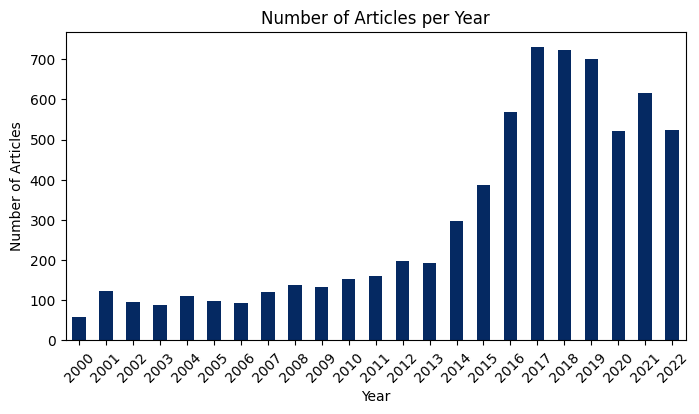

In [20]:
# count the number of articles per year
count_plot = article['web_publication_date'].groupby(article['web_publication_date'].dt.year).agg({'count'}).plot(kind='bar', color='#052962')

# change the x-axis label
count_plot.set_xlabel('Year')
# rotate the x-axis label
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45)
# change the y-axis label
count_plot.set_ylabel('Number of Articles')
# change the title
count_plot.set_title('Number of Articles per Year')
# remove the legend
count_plot.legend().set_visible(False)

# resize the plot
count_plot.figure.set_size_inches(8, 4)



In [21]:
# save plot
fig_count = count_plot.get_figure()
fig_count.savefig('../outputs/count.png')

In [22]:
# check out the production office of the articles
article['production_office'].value_counts()

UK     5866
US      566
AUS     375
Name: production_office, dtype: int64

/var/folders/d0/5yt19bqs6bv_03rdznqvkyym0000gn/T/ipykernel_2016/3871437348.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_plot_pivot = df_plot.pivot('production_office', 'web_publication_date', 'n')


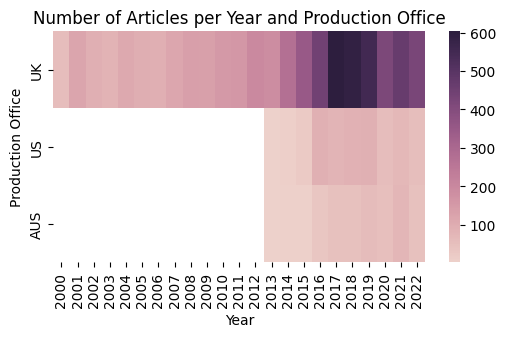

In [12]:
#transform the column web_publication_date to datetime with only the months and years
#article['web_publication_date'] = pd.to_datetime(article['web_publication_date']).dt.to_period('Y')
article['web_publication_date'] = pd.to_datetime(article['web_publication_date']).dt.year

# preparig data for the plot
df_plot = (article
.groupby(['production_office','web_publication_date'])['body_text']
.count()
.to_frame('n')
.reset_index()
)

#pivot for heatmap
df_plot_pivot = df_plot.pivot('production_office', 'web_publication_date', 'n')
# index for heatmap
df_index = df_plot.groupby('production_office')['n'].transform('sum').sort_values(ascending=False).index
df_index = df_plot.loc[df_index, 'production_office'].unique()
# reindexed pivot
df_plot_pivot = df_plot_pivot.reindex(index = df_index)

ax_heat = sns.heatmap(df_plot_pivot, annot=False, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=True, yticklabels=True)
ax_heat.set(xlabel='Year', ylabel='Production Office', title='Number of Articles per Year and Production Office')
ax_heat.figure.set_size_inches(6, 3)

/var/folders/d0/5yt19bqs6bv_03rdznqvkyym0000gn/T/ipykernel_2016/1561926813.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_plot_pivot = df_plot.pivot('production_office', 'web_publication_date', 'n')


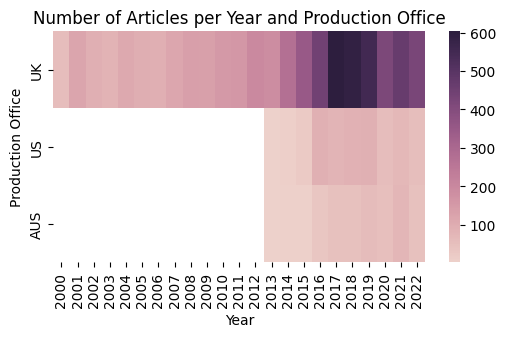

In [16]:
#pivot for heatmap
df_plot_pivot = df_plot.pivot('production_office', 'web_publication_date', 'n')
# index for heatmap
df_index = df_plot.groupby('production_office')['n'].transform('sum').sort_values(ascending=False).index
df_index = df_plot.loc[df_index, 'production_office'].unique()
# reindexed pivot
df_plot_pivot = df_plot_pivot.reindex(index = df_index)

ax_heat = sns.heatmap(df_plot_pivot, annot=False, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=True, yticklabels=True)
ax_heat.set(xlabel='Year', ylabel='Production Office', title='Number of Articles per Year and Production Office')
ax_heat.figure.set_size_inches(6, 3)

In [14]:
fig_heat = ax_heat.get_figure()
fig_heat.savefig('../outputs/heatmap.png',dpi=300, bbox_inches='tight')

In [23]:
# group by publication office and by publication
article.groupby(['production_office','publication']).size()


production_office  publication    
AUS                The Guardian         25
                   theguardian.com     350
UK                 The Guardian       2348
                   The Observer        838
                   theguardian.com    2680
US                 The Guardian         58
                   The Observer          6
                   theguardian.com     502
dtype: int64

In [58]:
import seaborn as sns
#hex colour of Guardian is #052962

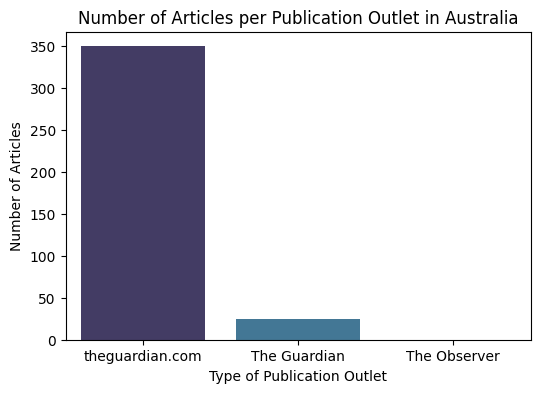

In [31]:
#for production office AUS groupby publication and make a plot with seaborn
ax = sns.countplot(x='publication', data=article[article['production_office']=='AUS'], palette="mako",order=['theguardian.com','The Guardian','The Observer'])

#change color palette of the plot and add a title and axis labels

ax.set_title('Number of Articles per Publication Outlet in Australia')
# set the font size of the title
ax.title.set_size(12)
ax.set_xlabel('Type of Publication Outlet')
ax.set_ylabel('Number of Articles')
# change background color of the plot and the entire figure
ax.set_facecolor("white")

# resize the plot
ax.figure.set_size_inches(6, 4)


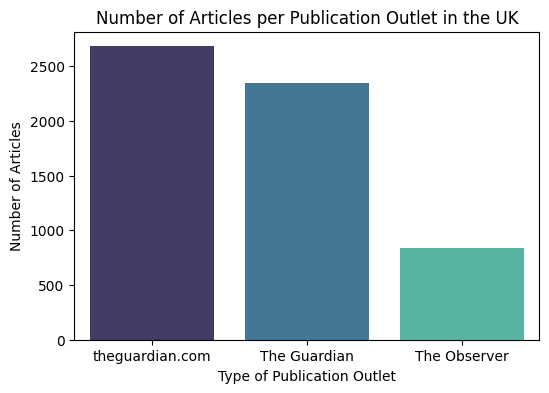

In [32]:
#for production office AUS groupby publication and make a plot with seaborn
ax_uk = sns.countplot(x='publication', data=article[article['production_office']=='UK'], palette="mako", order=['theguardian.com','The Guardian','The Observer'])

#change color palette of the plot and add a title and axis labels

ax_uk.set_title('Number of Articles per Publication Outlet in the UK')
ax_uk.set_xlabel('Type of Publication Outlet')
ax_uk.set_ylabel('Number of Articles')
# change background color of the plot and the entire figure
ax_uk.set_facecolor("white")
# reorder the x axis labels
# resize the plot
ax_uk.figure.set_size_inches(6, 4)


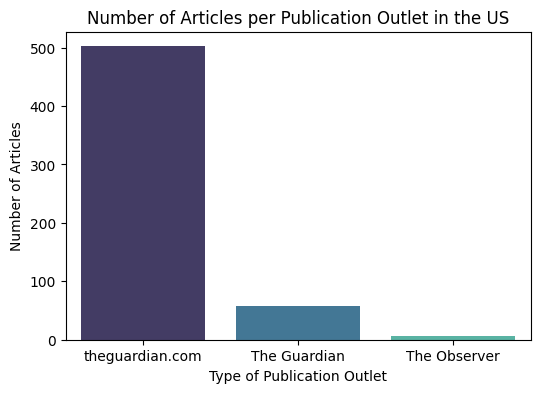

In [35]:
#for production office AUS groupby publication and make a plot with seaborn
ax_us = sns.countplot(x='publication', data=article[article['production_office']=='US'], palette="mako", order=['theguardian.com','The Guardian','The Observer'])

#change color palette of the plot and add a title and axis labels

ax_us.set_title('Number of Articles per Publication Outlet in the US')
ax_us.set_xlabel('Type of Publication Outlet')
ax_us.set_ylabel('Number of Articles')
# change background color of the plot and the entire figure
ax_us.set_facecolor("white")
# resize the plot
ax_us.figure.set_size_inches(6, 4)

In [34]:
# save all the plots as png files
fig = ax.get_figure()
fig.savefig('../outputs/aus.png')
fig_uk = ax_uk.get_figure()
fig_uk.savefig('../outputs/uk.png')
fig_us = ax_us.get_figure()
fig_us.savefig('../outputs/us.png')

Text(0.5, 1.0, 'Number of Articles per Newspaper Section')

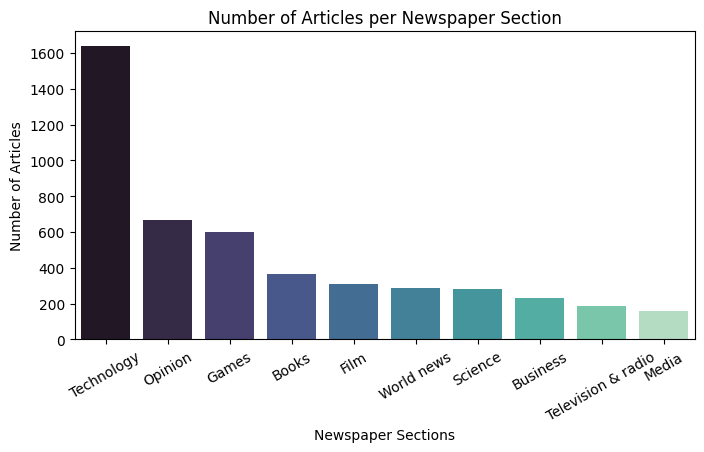

In [53]:
#for production office AUS groupby publication and make a plot with seaborn limited to the sections with more tan 100 articles
topics_plot = sns.countplot(x='section_name', data=article, palette="mako", order=article['section_name'].value_counts().iloc[:10].index)
#topics_plot = sns.countplot(x='section_name', data=article, palette="mako")
# rotate the x-axis label
topics_plot.set_xticklabels(topics_plot.get_xticklabels(), rotation=30)
# resize the plot
topics_plot.figure.set_size_inches(8, 4)
# rename the x-axis label
topics_plot.set_xlabel('Newspaper Sections')
# rename y-axis label
topics_plot.set_ylabel('Number of Articles')
# set the title
topics_plot.set_title('Number of Articles per Newspaper Section')


In [56]:
fig_topics = topics_plot.get_figure()
fig_topics.savefig('../outputs/topics_count.png', dpi=300, bbox_inches='tight')